In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty.csv")

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (2,4,5,8,11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
df = df.drop("Unnamed: 0", 1)
df = df.drop("id_szkoly", 1)

In [4]:
for col in df.columns:
    if col.endswith("_laureat"):
        df[col] = df[col].fillna(False)

In [5]:
df['kobieta'] = df['plec'] == "k"
df.drop('plec', 1, inplace=True)
df['dysleksja'] = df['dysleksja'] == True # fixing

In [6]:
kolumny_przedmotow = [col for col in df if col.endswith("podstawowa") or col.endswith("rozszerzona")]

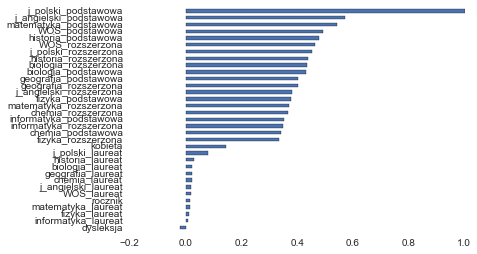

In [40]:
df.corrwith(df.j_polski_podstawowa).order().plot(kind='barh');

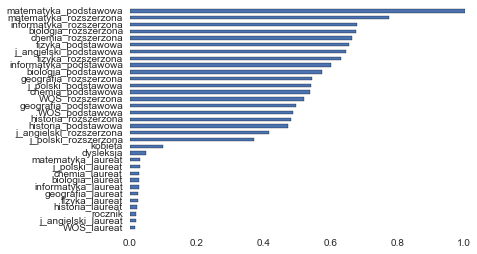

In [41]:
df.corrwith(df.matematyka_podstawowa).order().plot(kind='barh');

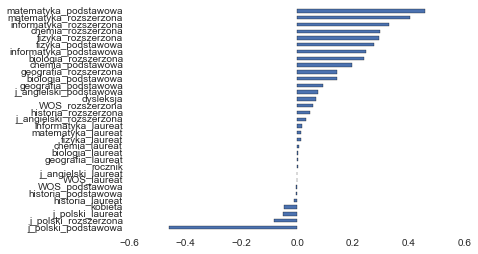

In [42]:
(df.corrwith(df.matematyka_podstawowa) - df.corrwith(df.j_polski_podstawowa)).order().plot(kind='barh');

In [51]:
korelacje_mp = pd.DataFrame([df.corrwith(df.matematyka_podstawowa), df.corrwith(df.j_polski_podstawowa)],
                            index=["korelacja z matematyka_podstawowa", "korelacja z j_polski_podstawowa"])

korelacje_mp = korelacje_mp[kolumny_przedmotow].transpose()

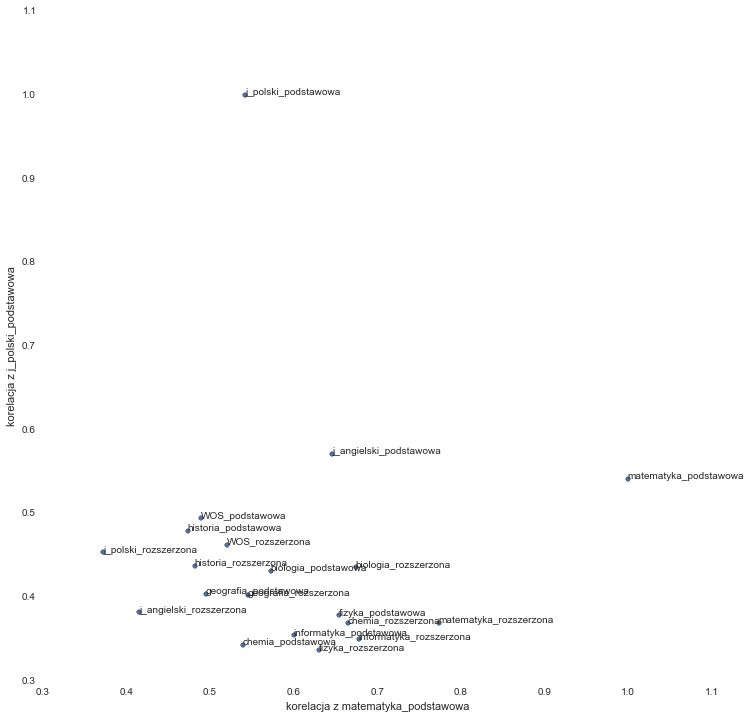

In [52]:
korelacje_mp.plot(x='korelacja z matematyka_podstawowa', y='korelacja z j_polski_podstawowa',
                  kind='scatter', figsize=(12,12))
for k, v in korelacje_mp.iterrows():
    plt.text(v['korelacja z matematyka_podstawowa'], v['korelacja z j_polski_podstawowa'], k)

In [ ]:
# do zastanowienia sie - czy takie korelacje sie dobre,
# czy jednak samo to, ze jednak sam efekt wybory przedmiotow nie jest za silny

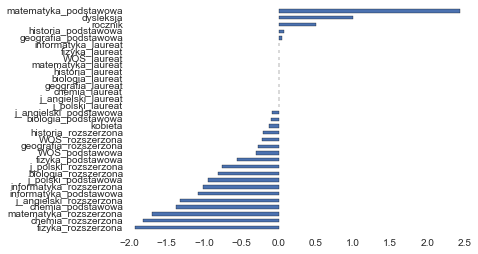

In [56]:
(df[df.dysleksja == True].mean() - df[df.dysleksja == False].mean()).order().plot(kind='barh');

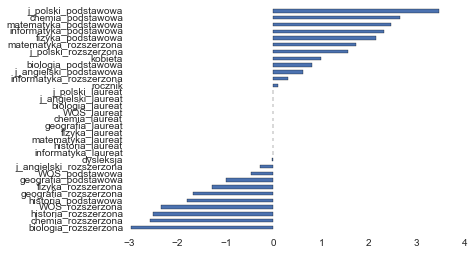

In [57]:
(df[df.kobieta == True].mean() - df[df.kobieta == False].mean()).order().plot(kind='barh');

In [4]:
korelacje = df[[col for col in df if col.endswith("podstawowa") or col.endswith("rozszerzona")]].corr()

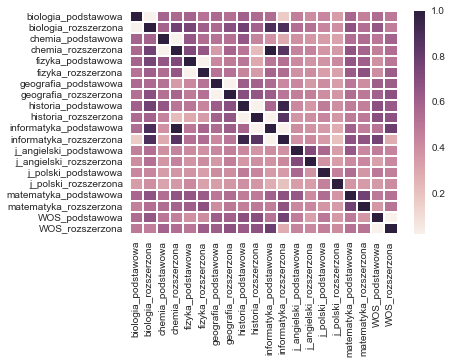

In [5]:
sns.heatmap(korelacje);

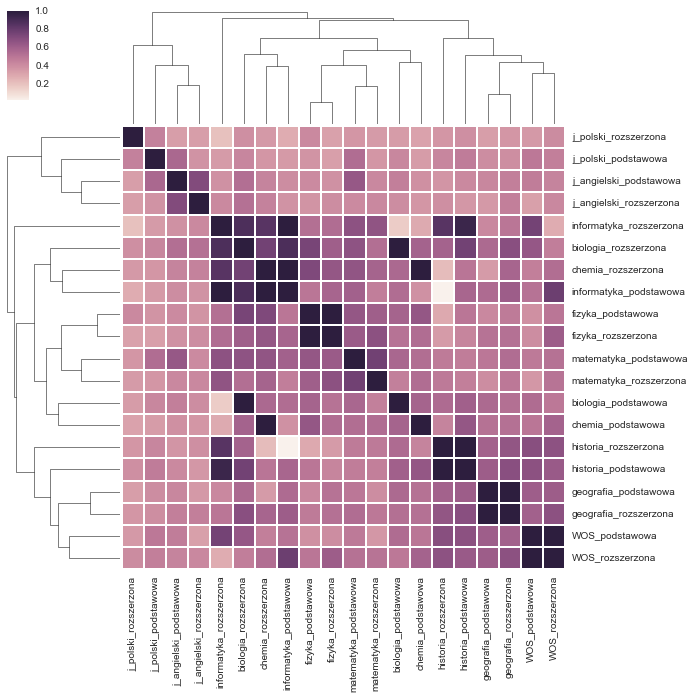

In [6]:
sns.clustermap(korelacje.fillna(1));

In [7]:
vals, vecs = linalg.eigh(korelacje.fillna(1))

In [8]:
vals

array([ -0.69848855,  -0.41670581,  -0.17438219,  -0.13703592,
        -0.02715814,   0.0298886 ,   0.10411754,   0.14876188,
         0.30300987,   0.46823272,   0.60753886,   0.6672169 ,
         0.74181813,   0.83807762,   0.90417708,   1.0396353 ,
         1.18339235,   1.44971157,   1.85011243,  11.11807975])